<a href="https://colab.research.google.com/github/deea-c/thesis_absa/blob/main/Thesis_Read_and_transform_data_EDA_and_Lang_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/code
!pwd

/content/drive/MyDrive/Colab Notebooks/code
/content/drive/MyDrive/Colab Notebooks/code


# Read XML files and prepare save to pkl

In [ ]:
# # Unzip Folders 
# !unzip "Data/Test English.zip" -d "Data/Test English"
# !unzip "Data/Train English.zip" -d "Data/Train English"
# !unzip "Data/Test Spanish.zip" -d "Data/Test Spanish"
# !unzip "Data/Train Spanish.zip" -d "Data/Train Spanish"
# !unzip "Data/Test French.zip" -d "Data/Test French"
# !unzip "Data/Train French.zip" -d "Data/Train French"

In [ ]:
# import glob
# zips = glob.glob("Data/" + '/*/*')
# zips

In [ ]:
# import pandas as pd
# import xml.etree.ElementTree as ET
# def read_xml_files(file_path ):
#   tree = ET.parse(file_path)
#   root = tree.getroot()

#   reviews = []
#   sentences = []

#   for review in root.findall('Review'):
#       rid = review.get('rid')
#       for sentence in review.findall('sentences/sentence'):
#           sentence_id = sentence.get('id')
#           sentence_text =  sentence.find('text').text
#           opinions = sentence.find('Opinions')
#           sentence_opinions = []
#           if opinions is not None:
#               for opinion in opinions.iter('Opinion'):
#                   opinion_target = opinion.get('target')
#                   opinion_category = opinion.get('category')
#                   opinion_polarity = opinion.get('polarity')
#                   from_ = int(opinion.get('from'))
#                   to_ = int(opinion.get('to'))
#                   sentence_opinions.append((opinion_target, opinion_category, opinion_polarity, from_ , to_))
#           sentences.append((sentence_id, sentence_text, sentence_opinions))
#       reviews.append(sentences)
#       sentences = []

#   df_rows = []
#   for review in reviews:
#       for sentence in review:
#           sentence_id, sentence_text, sentence_opinions = sentence
#           for opinion in sentence_opinions:
#               opinion_target, opinion_category, opinion_polarity  , from_ , to_= opinion
#               df_rows.append((review[0][0], sentence_id, sentence_text, opinion_target, opinion_category, opinion_polarity, from_ , to_))
              
#   df = pd.DataFrame(df_rows, columns=['Review_id', 'Sentence_id', 'Text', 'Opinion_target', 'Opinion_category', 'Opinion_polarity', "From", "To"])
#   return df

In [ ]:
#  Test_English =read_xml_files('Data/Test English/EN_REST_SB1_TEST.xml.gold')
#  Train_English =read_xml_files('Data/Train English/ABSA16_Restaurants_Train_SB1_v2.xml')
#  Test_Spanish =read_xml_files('Data/Test Spanish/SP_REST_SB1_TEST.xml.gold')
#  Train_Spanish =read_xml_files('Data/Train Spanish/SemEval-2016ABSA Restaurants-Spanish_Train_Subtask1.xml')
#  Test_French =read_xml_files('Data/Test French/ABSA16FR_Restaurants_Gold-withcontent.xml')
#  Train_French =read_xml_files('Data/Train French/ABSA16FR_Restaurants_Train-withcontent.xml')

In [ ]:
# data_list = [Test_English , Train_English , Test_Spanish , Train_Spanish , Test_French , Train_French ]
# data_list_names = ["test_English" , "train_English" , "test_Spanish" , "train_Spanish" ,"test_French" , "train_French" ]
# for i in range(len(data_list)):
#   data_list[i].to_json("Data/json/"+ str( data_list_names[i] ) + ".json")

#Load the data from  pkls


In [ ]:
import glob
import pandas as pd
# files = glob.glob("Data/ParsedData/" + "/*.pkl")
# files

In [ ]:
test_English =pd.read_pickle('../Data/ParsedData/test_English.pkl')
train_English =pd.read_pickle('../Data/ParsedData/train_English.pkl')
test_Spanish =pd.read_pickle('../Data/ParsedData/test_Spanish.pkl')
train_Spanish =pd.read_pickle('../Data/ParsedData/train_Spanish.pkl')
test_French =pd.read_pickle('../Data/ParsedData/test_French.pkl')
train_French =pd.read_pickle('../Data/ParsedData/train_French.pkl')
test_Dutch =pd.read_pickle('../Data/ParsedData/test_dutch.pkl')
train_Dutch =pd.read_pickle('../Data/ParsedData/train_dutch.pkl')
test_Russian =pd.read_pickle('../Data/ParsedData/test_russian.pkl')
train_Russian =pd.read_pickle('../Data/ParsedData/train_russian.pkl')


In [ ]:
train_English.columns

Index(['Review_id', 'Sentence_id', 'Text', 'Opinion_target',
       'Opinion_category', 'Opinion_polarity', 'From', 'To'],
      dtype='object')

# EDA

In [ ]:
df_eda = pd.concat([test_English , train_English, test_Dutch , train_Dutch , test_Spanish , train_Spanish , test_French , train_French,test_Russian , train_Russian ], 
                   keys = ["test_English" , "train_English" ,"test_Dutch" , "train_Dutch", "test_Spanish" , "train_Spanish" ,"test_French" , "train_French","test_Russian" , "train_Russian" ] , names = ["dataset","original_index"] ).reset_index()
df_eda

,dataset,original_index,Review_id,Sentence_id,Text,Opinion_target,Opinion_category,Opinion_polarity,From,To
0,test_English,0,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:0,Yum!,NULL,FOOD#QUALITY,positive,0,0
1,test_English,1,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:1,Serves really good sushi.,sushi,FOOD#QUALITY,positive,19,24
2,test_English,2,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:2,Not the biggest portions but adequate.,portions,FOOD#STYLE_OPTIONS,neutral,16,24
3,test_English,3,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:3,Green Tea creme brulee is a must!,Green Tea creme brulee,FOOD#QUALITY,positive,0,22
4,test_English,4,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:4,Don't leave the restaurant without it.,NULL,FOOD#QUALITY,positive,0,0
...,...,...,...,...,...,...,...,...,...,...
18499,train_Russian,4084,9955:0,9955:1,"Впечатления остались только хорошие,интерьер п...",интерьер,AMBIENCE#GENERAL,positive,36,44
18500,train_Russian,4085,9955:0,9955:2,"Готовят вкусно и достаточно быстро,на мой взгляд.",NULL,FOOD#QUALITY,positive,0,0
18501,train_Russian,4086,9955:0,9955:3,"Обслуживала нас приятная,веселая девушка,успев...",девушка,SERVICE#GENERAL,positive,33,40
18502,train_Russian,4087,9955:0,9955:3,"Обслуживала нас приятная,веселая девушка,успев...",скидку,FOOD#PRICES,positive,91,97


In [ ]:
df_eda[['dataset', 'Language']] = df_eda['dataset'].str.split('_', expand=True)
df_eda.head()


,dataset,original_index,Review_id,Sentence_id,Text,Opinion_target,Opinion_category,Opinion_polarity,From,To,ds_type,Language
0,test,0,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:0,Yum!,NULL,FOOD#QUALITY,positive,0,0,test,English
1,test,1,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:1,Serves really good sushi.,sushi,FOOD#QUALITY,positive,19,24,test,English
2,test,2,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:2,Not the biggest portions but adequate.,portions,FOOD#STYLE_OPTIONS,neutral,16,24,test,English
3,test,3,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:3,Green Tea creme brulee is a must!,Green Tea creme brulee,FOOD#QUALITY,positive,0,22,test,English
4,test,4,en_BlueRibbonSushi_478218171:0,en_BlueRibbonSushi_478218171:4,Don't leave the restaurant without it.,NULL,FOOD#QUALITY,positive,0,0,test,English


In [ ]:
pd.pivot_table(df_eda, values="Sentence_id",index= ["Language","dataset"] , columns=['Opinion_polarity'], aggfunc= {'Sentence_id': "count"   }  )

Opinion_polarity  conflict  negative  neutral  positive
Language dataset                                       
Dutch    test          NaN     211.0     33.0     369.0
         train         NaN     646.0    152.0    1062.0
English  test          NaN     204.0     44.0     611.0
         train         NaN     749.0    101.0    1657.0
French   test          NaN     434.0     79.0     441.0
         train         NaN    1212.0    154.0    1164.0
Russian  test          6.0     321.0    103.0     870.0
         train         1.0     709.0    276.0    3103.0
Spanish  test          NaN     274.0     48.0     750.0
         train         1.0     674.0    120.0    1925.0

#Transfer Language

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
emo = pd.read_csv("../tr_lang/features/emo-diffs-cc-cos-5iter-zero-one-norm.txt", delimiter="\t",header=None, names= ["lang1", "lang2", "emo"], index_col=False )
ltq = pd.read_csv("../tr_lang/features/ltq_500_norm_download.txt", delimiter="\t",header=None, names= ["lang1", "lang2", "ltq"], index_col=False )
pos_ratio = pd.read_csv("../tr_lang/features/pos-ratio.csv" )


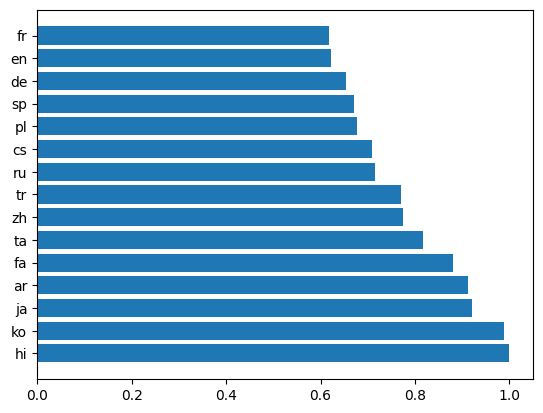

In [ ]:
nl_emo = emo[emo['lang1']=="nl"].sort_values('emo', ascending= False, )
nl_emo['lang2'] = nl_emo['lang2'].replace("es","sp")
plt.barh(nl_emo['lang2'] , nl_emo['emo'],)
plt.show()

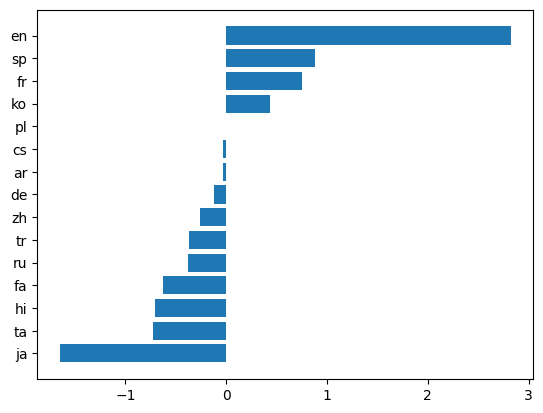

In [ ]:
nl_ltq = ltq[ltq['lang1']=="nl"].sort_values('ltq', ascending= True, )
nl_ltq['lang2'] = nl_ltq['lang2'].replace("es","sp")
plt.barh(nl_ltq['lang2'] , nl_ltq['ltq'],)
plt.show()



In [ ]:

pos_ratio['lang'] =pos_ratio['lang'].str[:2]
nl_pos = pos_ratio.loc[pos_ratio['lang'] == 'nl', ['pron','verb']].values
# print(nl_pos[0], nl_pos[1])
import math
def euclidean_distance(row):

    return math.dist(nl_pos.flatten(), row)

pos_ratio['e_dist'] = pos_ratio[['pron','verb']].apply(euclidean_distance,axis=1)
pos_ratio["LCR_pron"] = pos_ratio['pron'].apply(lambda x: nl_pos.flatten()[0] / x)
pos_ratio["LCR_verb"] = pos_ratio['verb'].apply(lambda x: nl_pos.flatten()[1] / x)
pos_ratio['LCRe_dist'] = pos_ratio[['LCR_pron','LCR_verb']].apply(lambda row: math.dist(pos_ratio.loc[pos_ratio['lang'] == 'nl', ['LCR_pron','LCR_verb']].values.flatten(),  row[['LCR_pron', 'LCR_verb']].values.flatten()), axis=1)
pos_ratio.sort_values('LCRe_dist')



,lang,noun,pron,verb,noun2verb,pron2noun,e_dist,LCR_pron,LCR_verb,LCRe_dist
9,nl,0.224220,0.036318,0.148487,0.601599,0.139396,0.000000,1.000000,1.000000,0.000000
10,ru,0.334784,0.042418,0.129022,0.721819,0.112455,0.020398,0.856190,1.150865,0.208426
1,ce,0.289307,0.044860,0.123549,0.700745,0.134243,0.026360,0.809594,1.201844,0.277480
13,ta,0.473732,0.028432,0.141764,0.769676,0.056618,0.010363,1.277381,1.047426,0.281406
5,fr,0.296398,0.040701,0.111801,0.726112,0.120739,0.036947,0.892311,1.328138,0.345357
11,po,0.325665,0.042144,0.108405,0.750259,0.114580,0.040503,0.861769,1.369744,0.394739
14,tu,0.390962,0.031069,0.256611,0.603734,0.073617,0.108252,1.168955,0.578645,0.453967
3,en,0.223553,0.067302,0.127988,0.635924,0.231392,0.037151,0.539632,1.160167,0.487435
12,sp,0.210900,0.055007,0.104719,0.668211,0.206866,0.047591,0.660240,1.417953,0.538629
6,hi,0.316791,0.048823,0.092719,0.773586,0.133536,0.057153,0.743878,1.601475,0.653736


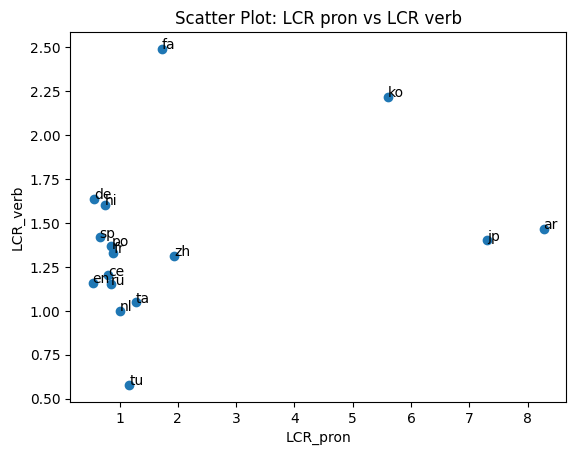

In [ ]:



# Extract the LCR_pron and LCR_verb columns from the DataFrame
lcr_pron = pos_ratio['LCR_pron']
lcr_verb = pos_ratio['LCR_verb']
lang = pos_ratio['lang']
# Create the scatter plot
plt.scatter(lcr_pron, lcr_verb)
# Add labels for each data point
for i in range(len(pos_ratio)):
    plt.text(lcr_pron[i], lcr_verb[i], lang[i])
# Set the labels and title of the plot
plt.xlabel('LCR_pron')
plt.ylabel('LCR_verb')
plt.title('Scatter Plot: LCR pron vs LCR verb')

# Display the plot
plt.show()

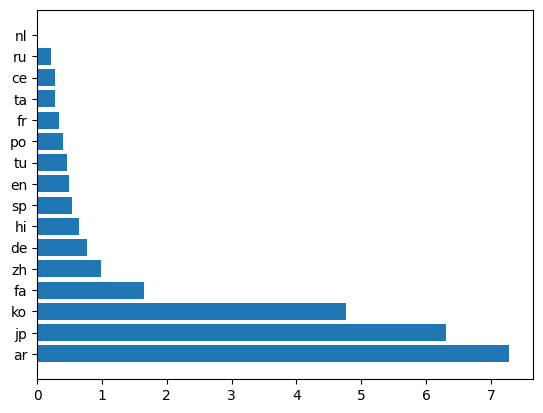

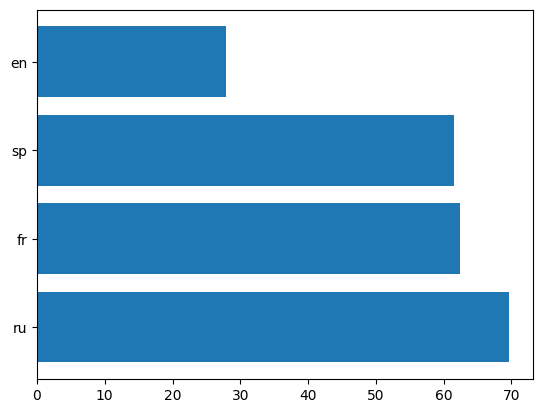

In [ ]:

nl_pos_ratio = pos_ratio.sort_values('LCRe_dist', ascending= False, )[['lang',"LCRe_dist"]]
plt.barh(nl_pos_ratio['lang'] , nl_pos_ratio['LCRe_dist'],)
plt.show()
# http://elinguistics.net/Compare_Languages.aspx
genetic_dist = [
    ('nl', 'en',27.9),
    ('nl', 'fr',62.4),
    ('nl', 'sp',61.5),
    ('nl', 'ru',69.7 )
]
genetic_distance = pd.DataFrame(genetic_dist, columns=['lang1', 'lang2','gen_dist'])

genetic_distance
nl_genetic_distance = genetic_distance.sort_values('gen_dist', ascending= False, )[['lang2',"gen_dist"]]
plt.barh(nl_genetic_distance['lang2'] , nl_genetic_distance['gen_dist'],)
plt.show()


In [ ]:

merged_df = pd.merge(nl_emo[['lang2','emo']], nl_pos_ratio, left_on='lang2', right_on='lang', how='inner').drop(["lang"], axis=1, inplace=False)
merged_df = pd.merge(merged_df, nl_ltq[['lang2','ltq']], left_on='lang2', right_on='lang2', how='inner')
merged_df = pd.merge(merged_df, genetic_distance[['lang2','gen_dist']], left_on='lang2', right_on='lang2', how='inner')
merged_df
# merged_df.drop(['key2', 'key3'], axis=1, inplace=True)
merged_df['gen_dist_rank'] = merged_df['gen_dist'].rank(method='min')
merged_df['LCRe_dist_rank'] = merged_df['LCRe_dist'].rank(method='min') #ptr vtd euclidian distance
merged_df['emo_rank'] = merged_df['emo'].rank(method='min')
merged_df['ltq_rank'] = merged_df['ltq'].rank(method='max', ascending= False)
merged_df['avg_rank'] = merged_df[['gen_dist_rank' , 'emo_rank', 'LCRe_dist_rank',  'ltq_rank']].sum(axis=1) /merged_df.shape[0]
merged_df




,lang2,emo,LCRe_dist,ltq,gen_dist,gen_dist_rank,LCRe_dist_rank,emo_rank,ltq_rank,avg_rank
0,ru,0.714507,0.208426,-0.373808,69.7,4.0,1.0,4.0,4.0,3.25
1,sp,0.671641,0.538629,0.882358,61.5,2.0,4.0,3.0,2.0,2.75
2,en,0.622226,0.487435,2.821404,27.9,1.0,3.0,2.0,1.0,1.75
3,fr,0.618612,0.345357,0.752159,62.4,3.0,2.0,1.0,3.0,2.25
